# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# Zip will create a list of tuples from the combination of latitude and longitude lists
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
from pprint import pprint

city_set = 1
num = 0

weather_data = []
base_url = "http://api.openweathermap.org/data/2.5/weather?q="


print("Beginning Data Retrieval")     
print("-----------------------------")

#for city in cities[:3]:  #<--- This will give first 3 rows 
for city in cities:
    num += 1
    print(f"Processing Record {num} of Set {city_set} | {city}")
    url = f"{base_url}{city}&appid={weather_api_key}&units=imperial"
    
    if num % 50 == 0: 
        city_set += 1
        num = 0
    try:
        r = requests.get(url).json()
        # pprint(r)

        city_weather = {
            "city_name": city,
            "latitude": r['coord']['lat'],
            "longitude": r['coord']['lon'], 
            "temperature_max": r['main']['temp_max'],
            "humidity_percent": r['main']['humidity'],
            "cloudiness_percent": r['clouds']['all'],
            "wind_speed_percent": r['wind']['speed'],
            "country": r['sys']['country'],
            "date": r['dt'] #Note: Will need to convert from Unix to Python date time, Google how to
        }

        weather_data.append(city_weather)
    except (KeyError, IndexError): 
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | meyungs
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | boulder city
Processing Record 4 of Set 1 | ushtobe
Processing Record 5 of Set 1 | santo antonio do ica
Processing Record 6 of Set 1 | mujiayingzi
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | tateyama
Processing Record 9 of Set 1 | melilla
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | lavrentiya
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 16 of Set 1 | gazli
Processing Record 17 of Set 1 | chum phae
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | simdega
Processing Record 20 of Set 1 | mar del plata
Processing Reco

Processing Record 37 of Set 4 | nikolskoye
Processing Record 38 of Set 4 | shubarkuduk
Processing Record 39 of Set 4 | mbini
Processing Record 40 of Set 4 | tuy hoa
Processing Record 41 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 4 | saldanha
Processing Record 43 of Set 4 | kodiak
Processing Record 44 of Set 4 | bow island
Processing Record 45 of Set 4 | aswan
Processing Record 46 of Set 4 | bethel
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | magistralnyy
Processing Record 49 of Set 4 | belle fourche
Processing Record 50 of Set 4 | tawkar
City not found. Skipping...
Processing Record 1 of Set 5 | ust-nera
Processing Record 2 of Set 5 | san jose
Processing Record 3 of Set 5 | yerbogachen
Processing Record 4 of Set 5 | hilo
Processing Record 5 of Set 5 | qaanaaq
Processing Record 6 of Set 5 | kaitangata
Processing Record 7 of Set 5 | tefe
Processing Record 8 of Set 5 | muscatine
Processing Record 9 of Set 5 | aykhal
Pr

Processing Record 28 of Set 8 | susehri
Processing Record 29 of Set 8 | ilulissat
Processing Record 30 of Set 8 | tilichiki
Processing Record 31 of Set 8 | kenai
Processing Record 32 of Set 8 | kollegal
Processing Record 33 of Set 8 | zhigansk
Processing Record 34 of Set 8 | aquin
Processing Record 35 of Set 8 | blackwater
Processing Record 36 of Set 8 | ugoofaaru
Processing Record 37 of Set 8 | dhidhdhoo
Processing Record 38 of Set 8 | sao felix do xingu
Processing Record 39 of Set 8 | iqaluit
Processing Record 40 of Set 8 | ternate
Processing Record 41 of Set 8 | dombas
Processing Record 42 of Set 8 | port-gentil
Processing Record 43 of Set 8 | katobu
Processing Record 44 of Set 8 | vao
Processing Record 45 of Set 8 | ondjiva
Processing Record 46 of Set 8 | bulawayo
Processing Record 47 of Set 8 | malanje
Processing Record 48 of Set 8 | bella union
Processing Record 49 of Set 8 | manicore
Processing Record 50 of Set 8 | trairi
Processing Record 1 of Set 9 | ahipara
Processing Record 

Processing Record 16 of Set 12 | saint-francois
Processing Record 17 of Set 12 | tessalit
Processing Record 18 of Set 12 | south venice
Processing Record 19 of Set 12 | kyrksaeterora
Processing Record 20 of Set 12 | baraboo
Processing Record 21 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 22 of Set 12 | abu dhabi
Processing Record 23 of Set 12 | saint george
Processing Record 24 of Set 12 | rundu
Processing Record 25 of Set 12 | tabuk
Processing Record 26 of Set 12 | oktyabrskiy
Processing Record 27 of Set 12 | port hardy
Processing Record 28 of Set 12 | qujing
Processing Record 29 of Set 12 | saint anthony
Processing Record 30 of Set 12 | okha
Processing Record 31 of Set 12 | sivas
Processing Record 32 of Set 12 | oranjemund
Processing Record 33 of Set 12 | bolshaya murta
City not found. Skipping...
Processing Record 34 of Set 12 | cesvaine
Processing Record 35 of Set 12 | santarem
Processing Record 36 of Set 12 | solovetskiy
City not found. Skipping...
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame(weather_data)
#use of inplace instead of overwriting variable
weather_df.rename(columns={
    "city_name": "City", 
    "latitude": "Lat",
    "longitude": "Lng",
    "temperature_max": "Max Temp",
    "humidity_percent": "Humidity",
    "cloudiness_percent": "Cloudiness",
    "wind_speed_percent": "Wind Speed",
    "country": "Country",
    "date": "Date"
}, inplace=True)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,70.88,78,8,13.49,PF,1597684082
1,boulder city,35.98,-114.83,100.99,22,1,9.17,US,1597684360
2,ushtobe,45.25,77.98,77.68,32,68,10.31,KZ,1597684360
3,santo antonio do ica,-3.10,-67.94,98.76,37,15,2.26,BR,1597684360
4,mujiayingzi,42.12,118.78,69.76,84,44,1.86,CN,1597684360


In [5]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'], unit='s')

In [6]:
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,70.88,78,8,13.49,PF,2020-08-17 17:08:02
1,boulder city,35.98,-114.83,100.99,22,1,9.17,US,2020-08-17 17:12:40
2,ushtobe,45.25,77.98,77.68,32,68,10.31,KZ,2020-08-17 17:12:40
3,santo antonio do ica,-3.10,-67.94,98.76,37,15,2.26,BR,2020-08-17 17:12:40
4,mujiayingzi,42.12,118.78,69.76,84,44,1.86,CN,2020-08-17 17:12:40
...,...,...,...,...,...,...,...,...,...
546,palmer,42.16,-72.33,78.01,57,40,1.01,US,2020-08-17 17:13:50
547,anloga,5.79,0.90,80.60,74,20,17.22,GH,2020-08-17 17:13:50
548,tombouctou,20.00,-3.00,110.12,15,0,10.09,ML,2020-08-17 17:13:50
549,khorramshahr,30.44,48.17,100.40,14,0,6.93,IR,2020-08-17 17:13:50


In [7]:
weather_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [8]:
# Rerun data from API. 
weather_df.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,21.298893,16.628058,70.970635,67.099819,48.965517,8.148584
std,32.637678,89.184694,15.280404,22.600222,37.185881,5.725240
min,-54.800000,-179.170000,33.800000,3.000000,0.000000,0.450000
25%,-4.485000,-61.525000,57.620000,52.000000,8.000000,4.150000
50%,26.330000,20.980000,73.620000,73.000000,50.000000,6.930000
75%,48.025000,88.510000,81.045000,84.000000,84.000000,10.290000
max,78.220000,179.320000,115.650000,100.000000,100.000000,34.810000


In [10]:
#  Get the indices of cities that have humidity over 100%.

weather_df[weather_df["Humidity"] > 100]

# There are no cities with "Humidity" > 100%.

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_df = weather_df[weather_df["Humidity"] <= 100]
clean_city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,70.88,78,8,13.49,PF,2020-08-17 17:08:02
1,boulder city,35.98,-114.83,100.99,22,1,9.17,US,2020-08-17 17:12:40
2,ushtobe,45.25,77.98,77.68,32,68,10.31,KZ,2020-08-17 17:12:40
3,santo antonio do ica,-3.10,-67.94,98.76,37,15,2.26,BR,2020-08-17 17:12:40
4,mujiayingzi,42.12,118.78,69.76,84,44,1.86,CN,2020-08-17 17:12:40
...,...,...,...,...,...,...,...,...,...
546,palmer,42.16,-72.33,78.01,57,40,1.01,US,2020-08-17 17:13:50
547,anloga,5.79,0.90,80.60,74,20,17.22,GH,2020-08-17 17:13:50
548,tombouctou,20.00,-3.00,110.12,15,0,10.09,ML,2020-08-17 17:13:50
549,khorramshahr,30.44,48.17,100.40,14,0,6.93,IR,2020-08-17 17:13:50


In [12]:
# Export the City_Data into a csv
clean_city_df.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [13]:
%matplotlib inline

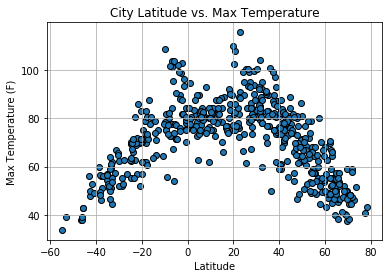

In [14]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Max Temp"], edgecolors='black')
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.grid()
plt.ylabel("Max Temperature (F)")
plt.savefig("output_data/Latitude_vs_Temperature_Plot")

#### As a cities location is closer to the equator the max temperature increases.

## Latitude vs. Humidity Plot

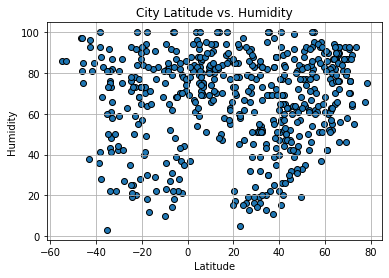

In [15]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Humidity"], edgecolors='black')
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("output_data/Latitude_vs_Humidity_Plot")

#### There is no correlation between a cities latitude and humidity.

## Latitude vs. Cloudiness Plot

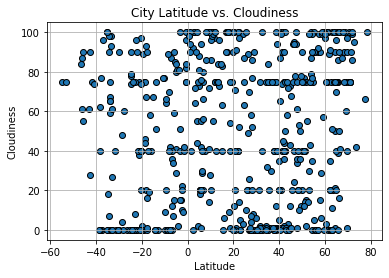

In [16]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Cloudiness"], edgecolors = 'black')
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("output_data/Latitude_vs_Cloudiness_Plot")

#### There is no correlation between a cities latitude and cloudiness.

## Latitude vs. Wind Speed Plot

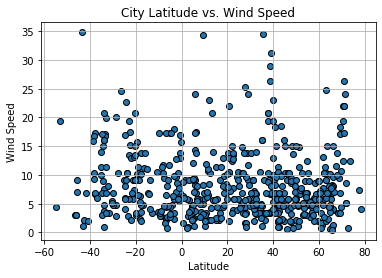

In [17]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Wind Speed"], edgecolors='black')
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("output_data/Latitude_vs_Wind_Speed_Plot")

#### There is no correlation between a cities latitude and wind speed.

## Linear Regression

In [18]:
# # OPTIONAL: Create a function to create Linear Regression plots

def lin_regression_plot(x, y, title, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # print("slope: %f    intercept: %f" % (slope, intercept))

    print(f"The r-squared is: {r_value ** 2}")

    plt.plot(x, y, 'o', label='original data')
    plt.plot(x, intercept + slope*x, 'r', label='fitted line')
    plt.legend()

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    filename = f"{title}_regression".replace(" ", "_")
    plt.savefig(f"output_data/{filename}")

In [19]:
# Create Northern and Southern Hemisphere DataFrames

northern_df = clean_city_df[clean_city_df["Lat"] >= 0]

southern_df = clean_city_df[clean_city_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5124257409702572


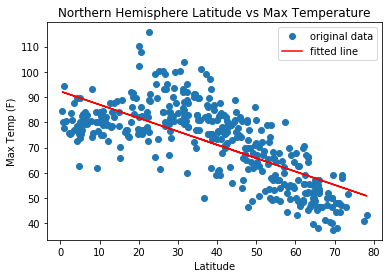

In [20]:
x = northern_df["Lat"] 
y = northern_df["Max Temp"]

title = "Northern Hemisphere Latitude vs Max Temperature"
xlabel = "Latitude"
ylabel = "Max Temp (F)"

lin_regression_plot(x, y, title, xlabel, ylabel)

# # Method 2:lin_regression_plot(northern_df["Lat"], 
#                     northern_df["Max Temp"], 
#                     "Latitude vs. Max Temp", 
#                     "Latitude", 
#                     "Max Temp"
#                    )

#### As the latitude increases the max temperature decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6675742098885095


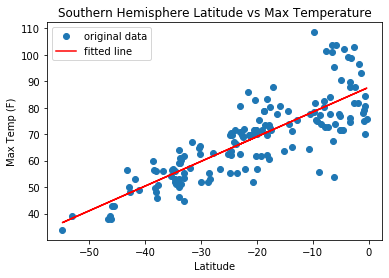

In [21]:
x = southern_df["Lat"] 
y = southern_df["Max Temp"]

title = "Southern Hemisphere Latitude vs Max Temperature"
xlabel = "Latitude"
ylabel = "Max Temp (F)"

lin_regression_plot(x, y, title, xlabel, ylabel)

#### The max temperature increases as the latitude gets closer to zero.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 2.4235391359183444e-05


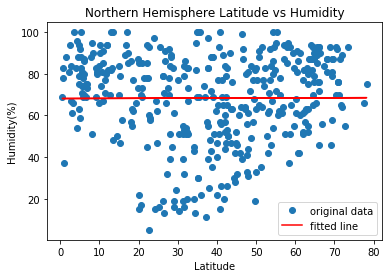

In [22]:
x = northern_df["Lat"] 
y = northern_df["Humidity"]

title = "Northern Hemisphere Latitude vs Humidity"
xlabel = "Latitude"
ylabel = "Humidity(%)"

lin_regression_plot(x, y, title, xlabel, ylabel)

#### There is no correlation between the cities in the Northern hemisphere and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.014284906007385453


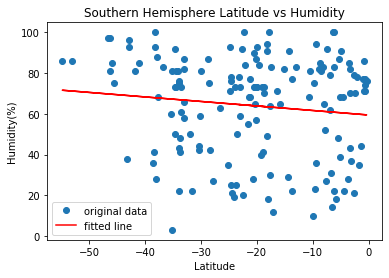

In [23]:
x = southern_df["Lat"] 
y = southern_df["Humidity"]

title = "Southern Hemisphere Latitude vs Humidity"
xlabel = "Latitude"
ylabel = "Humidity(%)"

lin_regression_plot(x, y, title, xlabel, ylabel)

#### There is no correlation between the cities in the Southern hemisphere and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0006741529572646755


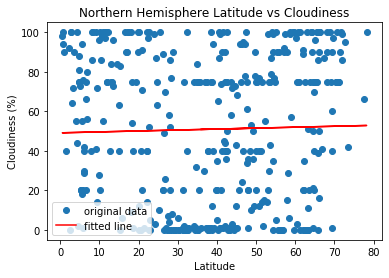

In [24]:
x = northern_df["Lat"] 
y = northern_df["Cloudiness"]

title = "Northern Hemisphere Latitude vs Cloudiness"
xlabel = "Latitude"
ylabel = "Cloudiness (%)"

lin_regression_plot(x, y, title, xlabel, ylabel)

#### There is no correlation between the cities in the Northern hemisphere and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0009849819205457614


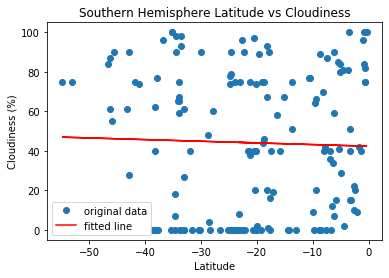

In [25]:
x = southern_df["Lat"] 
y = southern_df["Cloudiness"]

title = "Southern Hemisphere Latitude vs Cloudiness"
xlabel = "Latitude"
ylabel = "Cloudiness (%)"

lin_regression_plot(x, y, title, xlabel, ylabel)

#### There is no correlation between the cities in the Southern hemisphere and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0009038806552428339


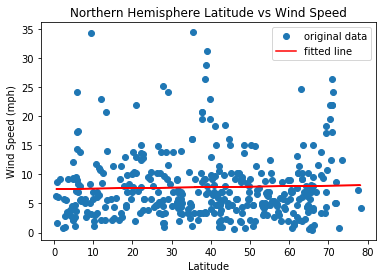

In [26]:
x = northern_df["Lat"] 
y = northern_df["Wind Speed"]

title = "Northern Hemisphere Latitude vs Wind Speed"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"

lin_regression_plot(x, y, title, xlabel, ylabel)

#### There is no correlation between the cities in the Northern hemisphere and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.012545817538918345


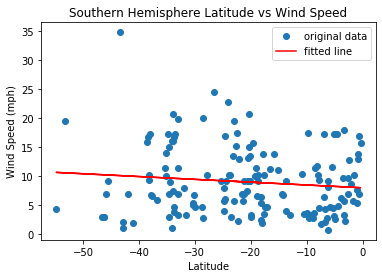

In [27]:
x = southern_df["Lat"] 
y = southern_df["Wind Speed"]

title = "Southern Hemisphere Latitude vs Wind Speed"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"

lin_regression_plot(x, y, title, xlabel, ylabel)

#### There is no correlation between the cities in the Southern hemisphere and wind speed.